#3.1 Assignment


#Kg= gas conductance

#spherical distribution A(x)= 4pix^2

#displaystyle: gives bigger integral size

#\dfrac: this is for a display-style fraction

#\int: command for an integral symbol.



equ (3.7)Kg: $\dfrac{D_g} {\displaystyle\int_{x_1}^{x_2} {\dfrac{\mathrm{d}x}{A(x)}}} $

Kg: $ \dfrac{D_g}{\displaystyle\int_{x_1}^{x_2} \dfrac{\mathrm{d}x}{4 \pi x^2}} $

Kg: $ \dfrac{D_g}{\dfrac{1}{4\pi}\displaystyle\int_{x_1}^{x_2} \dfrac{\mathrm{d}x}{x^2}} $

Kg: $\dfrac{D_g}{\dfrac{1}{4\pi} * -(x^{-2}+1)}$

Kg: $ \dfrac{D_g} {\dfrac{1}{4\pi} * (\dfrac{x_2}{x_1*x_2} - \dfrac{x_1}{x_1*x_2})} $


 (Equation 3.10) Kg: $\dfrac{4 * \pi * D_g * x_1 *x_2}{x_2-x_1} $



equ (3.7) Kg: $\dfrac{D_g}{\displaystyle\int_{x_1}^{x_2} \dfrac{\mathrm{d}x}{A(x)}} $

Kg: $ \dfrac{D_g}{ \displaystyle\int_{x_1}^{x_2} \dfrac{\mathrm{d}x}{2 \pi  x}} $

Kg: $ \dfrac{D_g}{\dfrac{1}{2\pi}\displaystyle\int_{x_1}^{x_2} \dfrac{\mathrm{d}x}{x}} $

Kg: $ \dfrac{D_g}{\dfrac{1}{2\pi}*(\ln{x_2}-\ln{x_1})}  $

(Equation 3.11) Kg: $ \dfrac{2*\pi*D_g}{\ln{(x_2/x_1)}} $



#3.3
import piplite
await piplite.install ("matplotlib")

node   depth [m]   Co [g\m^3]
  0      0.00      274.61
  1      0.00      274.59
  2      0.03      270.12
  3      0.05      266.10
  4      0.08      262.50
  5      0.10      259.28
  6      0.12      256.40
  7      0.15      253.85
  8      0.17      251.60
  9      0.20      249.61
 10      0.22      247.88
 11      0.25      246.38
 12      0.27      245.09
 13      0.30      244.00
 14      0.33      243.08
 15      0.35      242.34
 16      0.38      241.74
 17      0.40      241.28
 18      0.43      240.95
 19      0.45      240.75
 20      0.48      240.65
 21      0.50      0.00


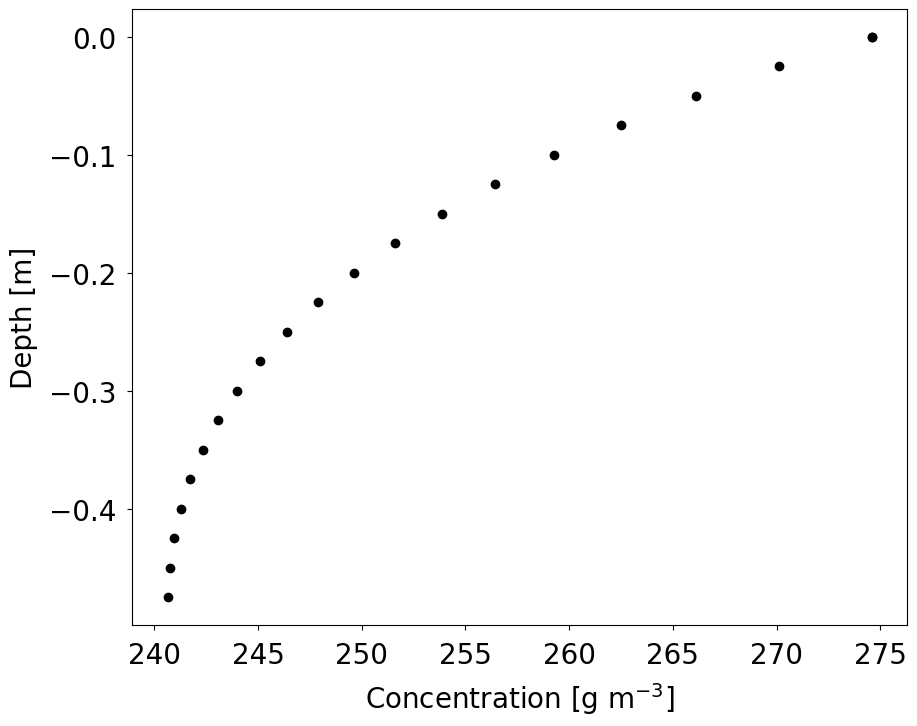

In [4]:
%run main.py


node   depth [m]   Co [g\m^3]
  0      0.00      274.61
  1      0.00      274.59
  2      0.03      260.30
  3      0.05      247.46
  4      0.08      235.93
  5      0.10      225.63
  6      0.12      216.44
  7      0.15      208.28
  8      0.17      201.07
  9      0.20      194.73
 10      0.22      189.19
 11      0.25      184.39
 12      0.27      180.27
 13      0.30      176.77
 14      0.33      173.85
 15      0.35      171.46
 16      0.38      169.55
 17      0.40      168.09
 18      0.43      167.04
 19      0.45      166.37
 20      0.48      166.05
 21      0.50      0.00


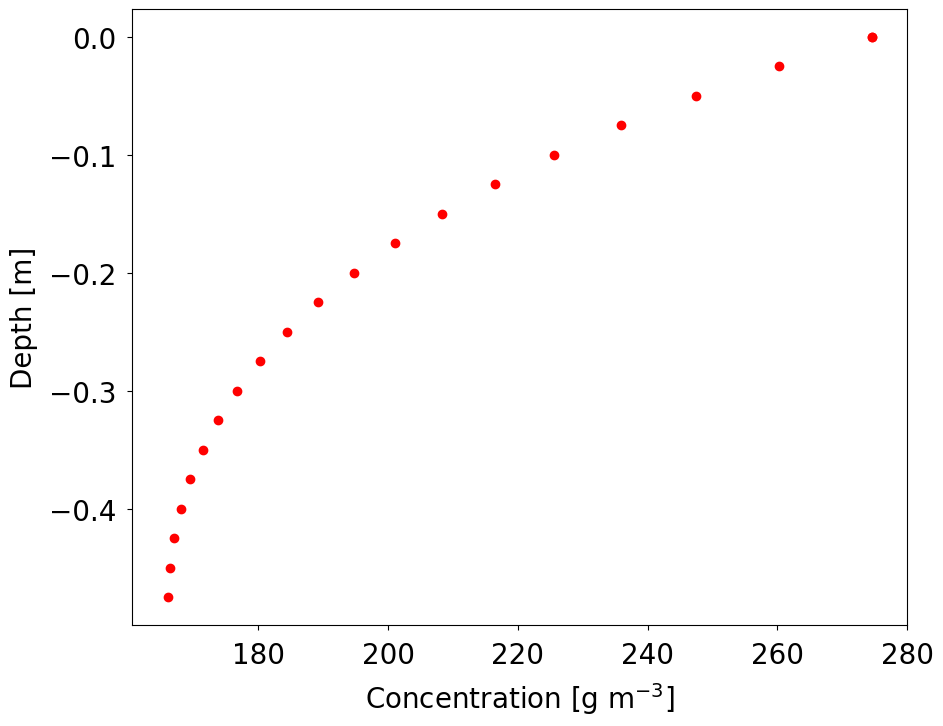

In [10]:

#3.2 Effect of water content
#increase water content to 0.3 from 0.2
#PSP_gasDiffusion
from math import exp
from PSP_ThomasAlgorithm import ThomasBoundaryCondition
import PSP_grid as grid
import matplotlib.pyplot as plt
import numpy as np

def gasSolver(boundaryLayerCond, boundaryOxygenConc, dg, 
                                respRate, totalDepth, n):
    a  = np.zeros(n+2, float)  
    b  = np.zeros(n+2, float)  
    c  = np.zeros(n+2, float)  
    d  = np.zeros(n+2, float) 
    g  = np.zeros(n+2, float) 
    u  = np.zeros(n+2, float)  
    co = np.zeros(n+2, float)  
    
    g[0] = boundaryLayerCond
    co[0] = boundaryOxygenConc
    # vector depth [m]
    z = grid.linear(n, totalDepth)
    
    # initialize matrix
    for i in range(1, n+1):
        u[i] = respRate * exp(-z[i] / 0.3) * (z[i + 1] - z[i - 1]) / 2.0
        if i < n:
            g[i] = dg / (z[i + 1] - z[i])
        else:
            g[i] = 0
        a[i + 1] = -g[i]
        b[i] = g[i - 1] + g[i]
        c[i] = -g[i]
        d[i] = u[i]

    d[1] = d[1] + g[0] * co[0]
    
    ThomasBoundaryCondition(a, b, c, d, co, 1, n)
    
    return(z, co)


def main():
    R = 8.3143                     
    n = 20                        
    totalDepth = 0.5               
    bulkDensity = 1300.            
    particleDensity = 2650.         
    waterContent = 0.3                 
    respRate = -0.001               
    oxygenDiff = 1.39e-5  #this is the value for carbon dioxide         
    temperature = 25.             
    atmPressure = 101.3           
    boundaryLayerCond = 0.01     
    
    # O2 concentration in air [g/m^3]
    boundaryOxygenConc = (0.21 * atmPressure * 1000. * 32. / 
                          (R * (temperature + 273.15))) 
    porosity = 1. - bulkDensity / particleDensity
    gasPorosity = porosity - waterContent
    
    #  binary diffusion coefficient [m2/s]
    binaryDiffCoeff = (oxygenDiff * (101.3 / atmPressure) 
                * ((temperature + 273.15) / 273.15)**1.75)
    
    bg = 0.9           
    mg = 2.3           
    dg = binaryDiffCoeff * bg * gasPorosity**mg
    
    z, co = gasSolver(boundaryLayerCond, boundaryOxygenConc, 
                      dg, respRate, totalDepth, n)
      
    print ("node   depth [m]   Co [g\m^3]")
    for i in range(n + 2):
        print ("%3d    %6.2f      %.2f" %(i, z[i], co[i]))
    
    # plot results
    fig = plt.figure(figsize=(10,8))
    for i in range(n+1):
        plt.plot(co[i], -z[i], 'ro')
        
    plt.xlabel('Concentration [g m$^{-3}$]',fontsize=20,labelpad=8)
    plt.ylabel('Depth [m]',fontsize=20,labelpad=8)
    plt.tick_params(axis='both', which='major', labelsize=20,pad=8)
    plt.tick_params(axis='both', which='minor', labelsize=20,pad=8)
    plt.show()
main()

with increase in water content the concentration decrease

node   depth [m]   Co [g\m^3]
  0      0.00      274.61
  1      0.00      274.59
  2      0.03      272.25
  3      0.05      270.15
  4      0.08      268.27
  5      0.10      266.59
  6      0.12      265.09
  7      0.15      263.75
  8      0.17      262.57
  9      0.20      261.54
 10      0.22      260.63
 11      0.25      259.85
 12      0.27      259.18
 13      0.30      258.60
 14      0.33      258.13
 15      0.35      257.74
 16      0.38      257.42
 17      0.40      257.19
 18      0.43      257.01
 19      0.45      256.90
 20      0.48      256.85
 21      0.50      0.00


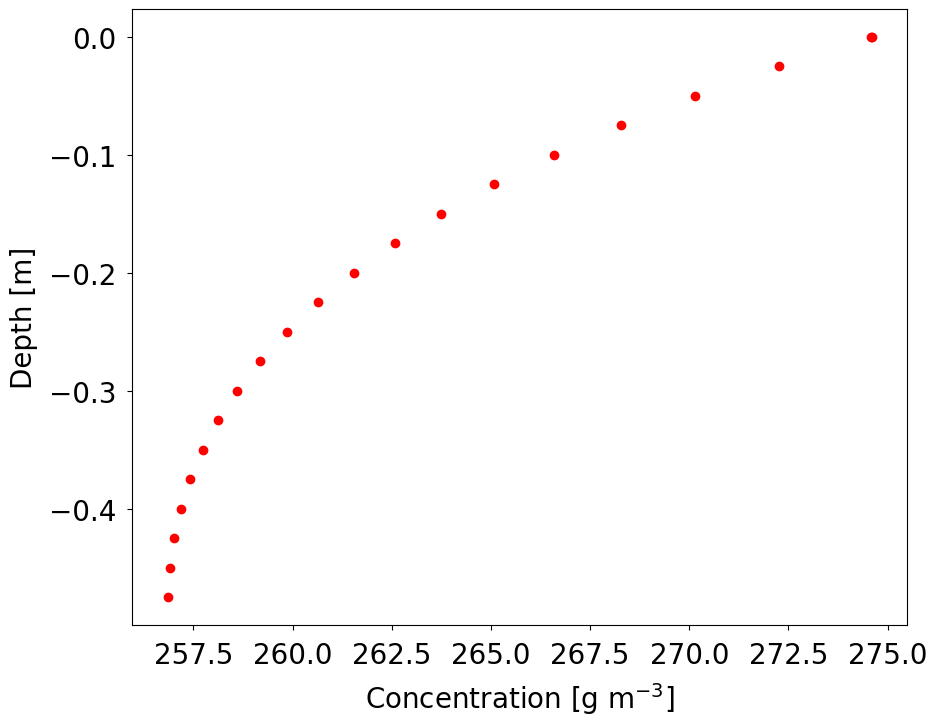

In [14]:

#3.2 Effect of bulk density
#decrease bulk density from 1300 to 1000
#PSP_gasDiffusion
from math import exp
from PSP_ThomasAlgorithm import ThomasBoundaryCondition
import PSP_grid as grid
import matplotlib.pyplot as plt
import numpy as np

def gasSolver(boundaryLayerCond, boundaryOxygenConc, dg, 
                                respRate, totalDepth, n):
    a  = np.zeros(n+2, float)  
    b  = np.zeros(n+2, float)  
    c  = np.zeros(n+2, float)  
    d  = np.zeros(n+2, float) 
    g  = np.zeros(n+2, float) 
    u  = np.zeros(n+2, float)  
    co = np.zeros(n+2, float)  
    
    g[0] = boundaryLayerCond
    co[0] = boundaryOxygenConc
    # vector depth [m]
    z = grid.linear(n, totalDepth)
    
    # initialize matrix
    for i in range(1, n+1):
        u[i] = respRate * exp(-z[i] / 0.3) * (z[i + 1] - z[i - 1]) / 2.0
        if i < n:
            g[i] = dg / (z[i + 1] - z[i])
        else:
            g[i] = 0
        a[i + 1] = -g[i]
        b[i] = g[i - 1] + g[i]
        c[i] = -g[i]
        d[i] = u[i]

    d[1] = d[1] + g[0] * co[0]
    
    ThomasBoundaryCondition(a, b, c, d, co, 1, n)
    
    return(z, co)


def main():
    R = 8.3143                     
    n = 20                        
    totalDepth = 0.5               
    bulkDensity = 900.            
    particleDensity = 2650.         
    waterContent = 0.2                 
    respRate = -0.001               
    oxygenDiff = 1.39e-5  #this is the value for carbon dioxide         
    temperature = 25.             
    atmPressure = 101.3           
    boundaryLayerCond = 0.01     
    
    # O2 concentration in air [g/m^3]
    boundaryOxygenConc = (0.21 * atmPressure * 1000. * 32. / 
                          (R * (temperature + 273.15))) 
    porosity = 1. - bulkDensity / particleDensity
    gasPorosity = porosity - waterContent
    
    #  binary diffusion coefficient [m2/s]
    binaryDiffCoeff = (oxygenDiff * (101.3 / atmPressure) 
                * ((temperature + 273.15) / 273.15)**1.75)
    
    bg = 0.9           
    mg = 2.3           
    dg = binaryDiffCoeff * bg * gasPorosity**mg
    
    z, co = gasSolver(boundaryLayerCond, boundaryOxygenConc, 
                      dg, respRate, totalDepth, n)
      
    print ("node   depth [m]   Co [g\m^3]")
    for i in range(n + 2):
        print ("%3d    %6.2f      %.2f" %(i, z[i], co[i]))
    
    # plot results
    fig = plt.figure(figsize=(10,8))
    for i in range(n+1):
        plt.plot(co[i], -z[i], 'ro')
        
    plt.xlabel('Concentration [g m$^{-3}$]',fontsize=20,labelpad=8)
    plt.ylabel('Depth [m]',fontsize=20,labelpad=8)
    plt.tick_params(axis='both', which='major', labelsize=20,pad=8)
    plt.tick_params(axis='both', which='minor', labelsize=20,pad=8)
    plt.show()
main()

Decrease in bulk density increase the oxygen concentration